In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from heatmap import heatmap
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 


In [2]:
# Analysis Plan
# Get all "Energy" genes
# Plot CI for them, for each day, differnt symbol if it's a hit.
# Try plot where it's done for each library

In [3]:
glycolysis = ['glk',
 'pgi',
 'pfkA',
 'pfkB',
 'fbp',
 'glpX',
 'fbaB',
 'fba',
 'tpiA',
 'gapA',
 'pgk',
 'gpmA',
 'gpmB',
 'pmgI',
 'eno',
 'pykA',
 'pykF',
 'pps',
 'aceE',
 'aceF',
 'lpdA',
 'nifJ',
 'adhC',
 'adh',
 'adhP',
 'yjgB',
 'eutG',
 'aldB',
 'acs',
 'galM',
 'yihR',
 'agp',
 'yihX',
 'pgm',
 'yeaD',
 'pckA',
 'celF',
 'bglA',
 'crr',
 'ptsG',
 'PTS']

In [7]:
res =  pd.read_csv("../../../data/results/26-07-final-results.csv", index_col=0)

In [10]:
g_df = res[res.gene.isin(glycolysis)].copy()
g_df['hits'] = g_df.zscore_padj < 0.05

In [48]:
dtg = g_df.groupby(['gene', 'day']).agg({'CI':['median'], 'hits':['sum']}).reset_index() 
dtg.columns = ['gene', 'day', 'CI', 'hits']
dtg['CI'] = np.log2(dtg['CI'])
dtg['hits_size'] = dtg.hits.apply(lambda x: 's' if x > 0 else 'h')


In [49]:
dtg.head()

,gene,day,CI,hits,hits_size
0,acs,d1,0.248501,0,h
1,acs,d2,-0.034519,0,h
2,acs,d3,-0.073763,0,h
3,acs,d4,-1.200720,2,s
4,adh,d1,-0.825515,1,s


In [60]:
def draw_ecm_heatmap(df, x_order=['d1', 'd2', 'd3', 'd4']):
    p = heatmap(
    x=df['day'], # Column to use as horizontal dimension 
    y=df['gene'], # Column to use as vertical dimension
    size_scale=900,
    #marker = list(df['hits_size'].values),
    #size=df['hits'], # Change this to see how it affects the plot
    x_order=x_order, # Sort order for x labels
    #y_order=bin_labels[::-1], # Sort order for y labels
    color=df['CI'], # Values to map to color, here we use number of items in each bucket
    palette=sns.diverging_palette(220, 20, n=200), # We'll use black->red palette
    color_range = (-4, 4)
    )
    return p

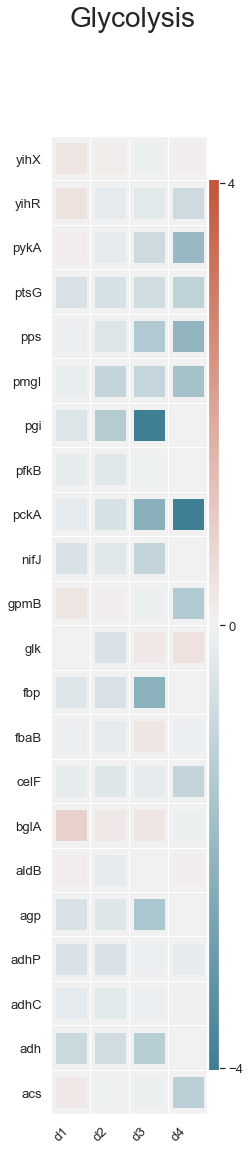

In [61]:

sns.set(color_codes=True, font_scale=1.2)
fig = plt.figure(figsize=(3, 18))
fig.suptitle("Glycolysis", fontsize=28)
p = draw_ecm_heatmap(dtg)

#fig.savefig(Path(dataDir)/"core_matrisome_externa.png", dpi=300, bbox_inches = "tight")

UsageError: Line magic function `%R` not found.
